In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------------------
# Load the bikes dataset
# ----------------------------------------
bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
print("First five rows of the bikes dataset:")
print(bikes.head())

print("\nDataset columns:")
print(bikes.columns)

# ----------------------------------------
# Preprocessing the Data
# ----------------------------------------
# We'll use "registered" as our target variable.
target_column = 'registered'

# Drop 'dteday' since it's an object and not directly useful without further processing.
# You could also extract useful features from it if needed.
X = bikes.drop(columns=[target_column, 'dteday'])
y = bikes[target_column]

# Identify categorical columns (if any) and one-hot encode them.
# In this dataset, columns like 'weathersit', 'season', 'holiday', and 'workingday'
# are already numeric. However, if you want to treat them as categorical, you can convert them.
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\nProcessed feature columns:")
print(X.head())

# ----------------------------------------
# Split and Scale the Data
# ----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features using MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------------------
# Build the Neural Network Model
# ----------------------------------------
model = Sequential()
model.add(Dense(128, input_dim=len(X_test_scaled[0]), activation='relu'))
model.add(Dropout(.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='leaky_relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
model.summary()

# ----------------------------------------
# Train the Model with Early Stopping
# ----------------------------------------
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_split=0.2,
    batch_size=128,
    callbacks=[early_stop],
    shuffle=False
)

First five rows of the bikes dataset:
     dteday   hr  casual  registered  temp_c  feels_like_c     hum  windspeed  \
0  1/1/2011  0.0       3          13     3.0           3.0  0.7957        0.8   
1  1/1/2011  1.0       8          30     1.7           1.7  0.8272        0.8   
2  1/1/2011  2.0       5          26     1.9           1.9  0.8157        1.1   
3  1/1/2011  3.0       3           9     2.5           2.5  0.7831        0.8   
4  1/1/2011  4.0       0           1     2.0           2.0  0.8075        1.1   

   weathersit  season  holiday  workingday  
0           1       1        0           0  
1           1       1        0           0  
2           1       1        0           0  
3           1       1        0           0  
4           1       1        0           0  

Dataset columns:
Index(['dteday', 'hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'season', 'holiday', 'workingday'],
      dtype='object')

Processed feat

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,945 (199.00 KB)

 Trainable params: 50,945 (199.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 72099.2812 - mse: 72099.2812 - val_loss: 39886.8984 - val_mse: 39886.8984
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 40193.3320 - mse: 40193.3320 - val_loss: 35253.5508 - val_mse: 35253.5508
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 36348.5078 - mse: 36348.5078 - val_loss: 33584.0469 - val_mse: 33584.0469
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 34598.2227 - mse: 34598.2227 - val_loss: 32632.3848 - val_mse: 32632.3848
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 33645.0391 - mse: 33645.0391 - val_loss: 31632.2285 - val_mse: 31632.2285
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 32885.1055 - mse: 32885.1055 - val_loss: 30832.9238 - val_mse: 30832.9238
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 32222.6445 - mse: 32222.6445 - val_loss: 30016.7520 - val_mse: 30016.7520
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - 

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step

Test RMSE: 118.59405467681547
Test R2: 0.7895006537437439


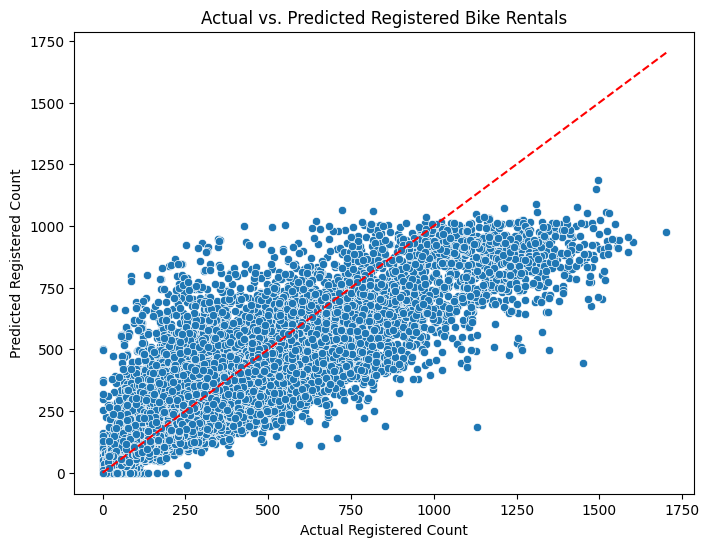

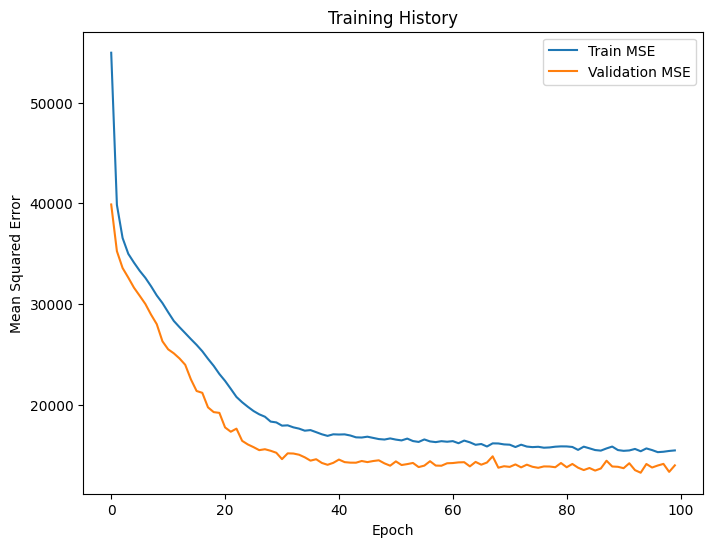

In [5]:
# ----------------------------------------
# Evaluate the Model on the Test Set
# ----------------------------------------
predictions = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print("\nTest RMSE:", rmse)
print("Test R2:", r2)

# ----------------------------------------
# Visualization: Actual vs. Predicted and Training History
# ----------------------------------------
# Scatterplot for Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=predictions.flatten())
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Registered Count')
plt.ylabel('Predicted Registered Count')
plt.title('Actual vs. Predicted Registered Bike Rentals')
plt.show()

# Plot training and validation loss (MSE) over epochs
plt.figure(figsize=(8,6))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.show()
